In [129]:
import numpy as np
import box_sm
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import lfilter

shape = (128,128)
sigma = 3.
data = np.random.random(shape)
q1 = gaussian_filter1d(data, 3, order=1)

h = sigma/2
d = np.array([1.41650+1.00829j,1.41650-1.00829j,1.86543+0.j])
d = np.exp(np.log(d)/h)

b0 = 1.+0.j
for i in range(0,3):
    b0 *= d[i]**(-1.)

    b = np.zeros((4,), dtype = np.complex)

    for i in range(1,3):
        for j in range(0,i):
            b[1] += d[i]*d[j]
    b[1] *= b0
    b[2] = -b0*np.sum(d)
    b[3] = b0

    b[0] = -np.sum(b)+1
    b = np.real(b)
    
q = np.array(data)

for i in range(0,shape[0]):
    q[i,:] = np.sum([q[max(i-j,0),:]*b[j] for j in range(0,4)],0)

for i in range(shape[0]-1,-1,-1):
    q[i,:] = np.sum([q[min(i+j,shape[0]-1),:]*b[j] for j in range(0,4)],0)
    
for i in range(0,shape[1]):
    q[:,i] = np.sum([q[:,max(i-j,0)]*b[j] for j in range(0,4)],0)

for i in range(shape[1]-1,-1,-1):
    q[:,i] = np.sum([q[:,min(i+j,shape[1]-1)]*b[j] for j in range(0,4)],0)


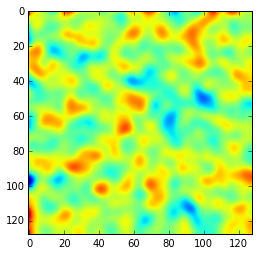

In [130]:
%matplotlib inline
plt.imshow(q)

In [134]:
shape = (128,128,128)
data = np.random.random(shape).astype(np.float32)
data_sm = gaussian_filter(data,(4,5,6), (0,1,2))

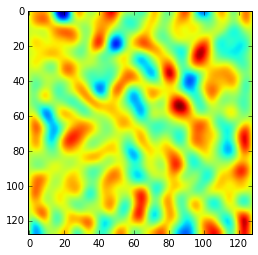

In [135]:
plt.imshow(data_sm[:,:,10])

In [143]:
from scipy.linalg import lu_factor, lu_solve

a = np.random.random((6,6)).astype(np.float32)
b = np.random.random((6,)).astype(np.float32)
for i in range(0,64**3):
    c = lu_solve(lu_factor(a), b)

In [142]:
64**3

262144